<a href="https://colab.research.google.com/github/bukolastella/Data-Science/blob/master/Deep%20Learning/from%20directory/Potholes_ZINDI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
import os
os.environ['ZINDI_CONFIG_DIR'] = "/content/gdrive/My Drive/Zindi"

%cd /content/gdrive/My Drive/Zindi

/content/gdrive/My Drive/Zindi


In [ ]:
pwd

'/content/gdrive/My Drive/Zindi'

In [ ]:
'''import requests
import requests, zipfile

#the url and auth_value from the website 
url = "https://api.zindi.africa/v1/competitions/miia-pothole-image-classification-challenge/files/all_data.zip"
myobj = {'auth_token': 'xQ1UFvv2GRNWc4CmZnvAcmmv'} #use your own

x = requests.post(url, data = myobj,stream=True)
target_path = '/content/gdrive/My Drive/Zindi/data.zip'

handle = open(target_path, "wb")
for chunk in x.iter_content(chunk_size=512):
  if chunk: # filter out keep-alive new chunks
    handle.write(chunk)
handle.close()'''

'import requests\nimport requests, zipfile\n\n#the url and auth_value from the website \nurl = "https://api.zindi.africa/v1/competitions/miia-pothole-image-classification-challenge/files/all_data.zip"\nmyobj = {\'auth_token\': \'xQ1UFvv2GRNWc4CmZnvAcmmv\'} #use your own\n\nx = requests.post(url, data = myobj,stream=True)\ntarget_path = \'/content/gdrive/My Drive/Zindi/data.zip\'\n\nhandle = open(target_path, "wb")\nfor chunk in x.iter_content(chunk_size=512):\n  if chunk: # filter out keep-alive new chunks\n    handle.write(chunk)\nhandle.close()'

In [ ]:
!unzip \*.zip  && rm *.zip

Streaming output truncated to the last 5000 lines.
  inflating: all_data/cvtXmpsCaHqIXhN.JPG  
  inflating: all_data/CWcCPuRIelvjbUh.JPG  
  inflating: all_data/CWDndxzJZyghBZQ.JPG  
  inflating: all_data/CWggZiyNlXKJvmv.JPG  
  inflating: all_data/CwgsVvoltZhQrds.JPG  
  inflating: all_data/cwHXPIqlAnvsXfe.JPG  
  inflating: all_data/CwKhvymmZWxSXaR.JPG  
  inflating: all_data/cwvtGrzHtYBDzgp.JPG  
  inflating: all_data/cWyUqCIjfJrEUmT.JPG  
  inflating: all_data/cxDQDhRvqMiUTtc.JPG  
  inflating: all_data/CXIzTKuTrbzhPHz.JPG  
  inflating: all_data/cxlvrFEWAaZPXpP.JPG  
  inflating: all_data/cxNjNEobxfWYcuX.JPG  
  inflating: all_data/cXPHwVdGZOgUvoa.JPG  
  inflating: all_data/cxPkBVOjmmUEHtQ.JPG  
  inflating: all_data/cXPNumxhuiuoLdR.JPG  
  inflating: all_data/CXPTUArTsUjjygJ.JPG  
  inflating: all_data/CXqjeZtNfFWKngU.JPG  
  inflating: all_data/cycpMAkFuBYzcnE.JPG  
  inflating: all_data/cyJQFhrvcEtJMXP.JPG  
  inflating: all_data/CYoYZaQkIHNWIMZ.JPG  
  inflating: all_data/Cyy

In [ ]:
!ls

all_data  Test	test_ids_only.csv  train  train_ids_labels.csv	Zebra.jfif


In [ ]:
import pandas as pd
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
def append_ext(fn):
  return fn + ".JPG"

In [ ]:
traindf = pd.read_csv('/content/gdrive/My Drive/Zindi/train_ids_labels.csv',dtype=str)
testdf = pd.read_csv('/content/gdrive/My Drive/Zindi/test_ids_only.csv',dtype=str)

In [ ]:
traindf["Image_ID"]=traindf["Image_ID"].apply(append_ext)
testdf["Image_ID"]=testdf["Image_ID"].apply(append_ext)

In [ ]:
traindf.head()

,Image_ID,Label
0,cVOfkSdqnWXUerr.JPG,0
1,EhnvIDPXFFjUhkR.JPG,0
2,tYKqoStvHsryFhS.JPG,1
3,eSpjlsZIwOMLmUS.JPG,1
4,uzxhIXjNENLyHwZ.JPG,1


In [ ]:
datagen = dict(rescale = 1./255, validation_split = 0.2)

In [ ]:
train_datagen = ImageDataGenerator(**datagen, horizontal_flip = True, height_shift_range= 0.2, width_shift_range=0.2, zoom_range=0.1)
valid_datagen = ImageDataGenerator(**datagen)

In [ ]:
train_dir = '/content/gdrive/My Drive/Zindi/all_data'
train_generator = train_datagen.flow_from_dataframe( 
    dataframe = traindf,
    directory = train_dir,
    x_col = "Image_ID",
    y_col = "Label",
    subset = 'training',
    shuffle = True,
    target_size = (150,150),
)

Found 3221 validated image filenames belonging to 2 classes.


In [ ]:
valid_generator = valid_datagen.flow_from_dataframe( 
    dataframe = traindf,
    directory = train_dir,
    x_col = "Image_ID",
    y_col = "Label",
    subset = 'validation',
    shuffle = True,
    target_size = (150,150),
)

Found 805 validated image filenames belonging to 2 classes.


In [ ]:
import numpy as np
dataset_labels = sorted(train_generator.class_indices.items(), key = lambda pair:pair[1])

dataset_labels = np.array([key.title() for key, value in dataset_labels])
print(dataset_labels)

['0' '1']


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, BatchNormalization, Dropout
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras import optimizers

model = Sequential([
                    Conv2D(32, 3, padding = 'same', kernel_initializer='he_uniform', activation='relu', input_shape = [150,150,3]),
                    MaxPooling2D(2),
                    Conv2D(32, 3, padding = 'same', kernel_initializer='he_uniform', activation='relu'),
                    MaxPooling2D(2),
                    Conv2D(64, 3, padding = 'same', kernel_initializer='he_uniform', activation='relu'),
                    MaxPooling2D(2),
                    Conv2D(64, 3, padding = 'same', kernel_initializer='he_uniform', activation='relu'),
                    MaxPooling2D(2),
                    Flatten(),
                    Dense(128,kernel_initializer='he_uniform', activation= 'relu'),
                    Dense(2, activation= 'softmax')
])

In [ ]:
model.compile(optimizer= optimizers.Adam(1e-3), loss = 'categorical_crossentropy', metrics=['accuracy'])

In [ ]:
import numpy as np
step = np.ceil(train_generator.samples/train_generator.batch_size)
valid_step = np.ceil(valid_generator.samples/valid_generator.batch_size)
early_stopping_cb = keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10)

history = model.fit(train_generator, steps_per_epoch=step, epochs=40, callbacks = [early_stopping_cb], validation_data= (valid_generator), validation_steps=valid_step)

Epoch 1/40
101/101 [==============================] - 43s 425ms/step - loss: 0.7796 - accuracy: 0.5973 - val_loss: 0.6309 - val_accuracy: 0.6311
Epoch 2/40
101/101 [==============================] - 43s 424ms/step - loss: 0.6191 - accuracy: 0.6600 - val_loss: 0.6005 - val_accuracy: 0.6932
Epoch 3/40
101/101 [==============================] - 43s 424ms/step - loss: 0.5755 - accuracy: 0.7156 - val_loss: 0.5780 - val_accuracy: 0.7416
Epoch 4/40
101/101 [==============================] - 43s 425ms/step - loss: 0.5407 - accuracy: 0.7339 - val_loss: 0.5730 - val_accuracy: 0.6870
Epoch 5/40
101/101 [==============================] - 43s 428ms/step - loss: 0.5166 - accuracy: 0.7423 - val_loss: 0.4754 - val_accuracy: 0.8050
Epoch 6/40
101/101 [==============================] - 43s 427ms/step - loss: 0.4734 - accuracy: 0.7799 - val_loss: 0.4351 - val_accuracy: 0.8186
Epoch 7/40
101/101 [==============================] - 43s 422ms/step - loss: 0.4653 - accuracy: 0.7824 - val_loss: 0.3822 - val_ac

(0.0, 1.0)

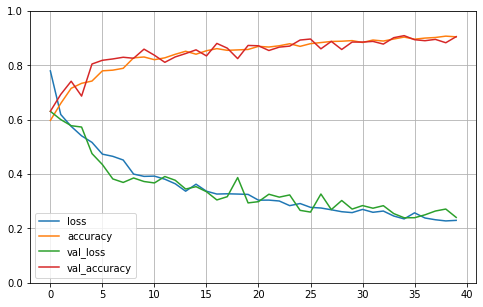

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
test_generator = test_datagen.flow_from_dataframe( 
    dataframe = testdf,
    directory = train_dir,
    x_col = "Image_ID",
    y_col = None,
    shuffle = False,
    class_mode=None,
    batch_size=1,
    target_size = (150,150),
)

Found 1650 validated image filenames.


In [ ]:
test_steps = np.ceil(test_generator.samples/test_generator.batch_size)
pred = model.predict_generator(test_generator, steps = test_steps)

Instructions for updating:
Please use Model.predict, which supports generators.


In [ ]:
pred[81]

array([0.09117576, 0.90882427], dtype=float32)

In [ ]:
new_pred = []
for i in pred:
  if i[0] > i[1]:
    new_pred.append(i[0])
  else:
    new_pred.append(i[1])

In [ ]:
new_pred[500]

0.5554136

In [ ]:
pred[:, 1]

array([0.08502546, 0.39411482, 0.01789908, ..., 0.14328444, 0.88901466,
       0.68806195], dtype=float32)

In [ ]:
np.argmax(pred[0])

0

In [ ]:
sample = pd.read_csv('/content/gdrive/My Drive/Zindi/test_ids_only.csv')


In [ ]:
sample['Label'] = new_pred

In [ ]:
sample.head()

,Image_ID,Label
0,nRhHxqLhDlJsiXc,0.914975
1,gbSntVovxgHQrmO,0.605885
2,nqOobGmvgEOiPms,0.982101
3,oIkPTooLcIbZKlF,0.980113
4,eSKxsTTJDQzkjgD,0.855199


In [ ]:
sample.to_csv('/content/gdrive/My Drive/Zindi/potholes_test.csv', header=True, index=False)